In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import defaultdict
import heapq

all_transformed_data = pd.read_csv("./transformed_samples_by_features.csv").drop(columns=["Unnamed: 0"]).values
all_transformed_data

all_feature_names = pd.read_csv("./transformed_samples_by_features.csv").drop(columns=["Unnamed: 0"]).columns
all_feature_names

Index(['AtomicNumber', 'AtomicPeriod', 'AtomicGroup', 'AtomicWeight',
       'EmpiricalRadius', 'CalculaterRadius', 'MolarVolume',
       'Electronegativity', 'AbsoluteMeltingPoint', 'Oxidation_States',
       ...
       'AtomicGroup Inverse Logarithmic', 'AtomicWeight Inverse Logarithmic',
       'EmpiricalRadius Inverse Logarithmic',
       'CalculaterRadius Inverse Logarithmic',
       'MolarVolume Inverse Logarithmic',
       'Electronegativity Inverse Logarithmic',
       'AbsoluteMeltingPoint Inverse Logarithmic',
       'Oxidation_States Inverse Logarithmic',
       'Bond dissociation energy Inverse Logarithmic',
       'Assumed CN Inverse Logarithmic'],
      dtype='object', length=132)

In [18]:
youngs_data = pd.read_csv("./Oxide_glass_1_5_02142020.csv")["Young's modulus E (GPa)"].values
youngs_data

array([68.9, 79. , 40. , ..., 63. , 63. , 42. ])

In [19]:
#https://analyticsindiamag.com/lasso-regression-in-python-with-machinehack-data-science-hackathon/
from sklearn.linear_model import Lasso
from sklearn import metrics
import math

alpha_powers = [0, 1, 1.5, 2, 2.5]
alpha_vals = []
for i in range(len(alpha_powers)):
    alpha_vals.append(10**(-alpha_powers[i]))
states = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71]



alpha_state_to_rmse_test = {}
alpha_state_to_rmse_train = {}

for alpha_val in alpha_vals:
    for state in states:
        X_train, X_test, y_train, y_test = train_test_split(all_transformed_data, youngs_data, test_size=0.2, random_state=state)
        lasso = Lasso(alpha = alpha_val, max_iter = 150000)
        lasso.fit(X_train, y_train)

        y_pred_test = lasso.predict(X_test)
        y_pred_train = lasso.predict(X_train)
        alpha_state_to_rmse_test[(alpha_val, state)] = math.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        alpha_state_to_rmse_train[(alpha_val, state)] = math.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
print(alpha_state_to_rmse_test)
print(alpha_state_to_rmse_train)

{(1, 1): 17.92548907416119, (1, 6): 17.874286621318102, (1, 11): 17.8793591638567, (1, 16): 95.36696976360298, (1, 21): 20.586576990868007, (1, 26): 19.082998532521046, (1, 31): 18.487560073927703, (1, 36): 19.78064847441241, (1, 41): 95.22027252613587, (1, 46): 18.959298273869873, (1, 51): 96.50235573048288, (1, 56): 17.872705413173573, (1, 61): 96.68790970462906, (1, 66): 18.245755354557552, (1, 71): 16.43046918785408, (0.1, 1): 13.58821524557629, (0.1, 6): 13.907031483750089, (0.1, 11): 12.064681657173121, (0.1, 16): 22.559604940011944, (0.1, 21): 15.555479994258, (0.1, 26): 13.98377034171802, (0.1, 31): 14.804737232345165, (0.1, 36): 14.838596956703752, (0.1, 41): 18.178017375129713, (0.1, 46): 15.940141940479386, (0.1, 51): 28.779982529785617, (0.1, 56): 13.889888847625135, (0.1, 61): 24.59618700581357, (0.1, 66): 13.274337582983836, (0.1, 71): 12.794831803527954, (0.03162277660168379, 1): 12.157460102840197, (0.03162277660168379, 6): 12.300395230190105, (0.03162277660168379, 11):

In [20]:
# state_1_rmse_test = []
# for key in alpha_state_to_rmse_test.keys():
#     if key[1] == 1:
#         state_1_rmse_test.append(alpha_state_to_rmse_test[key])
# state_1_rmse_train = []
# for key in alpha_state_to_rmse_train.keys():
#     if key[1] == 1:
#         state_1_rmse_train.append(alpha_state_to_rmse_train[key])
# plt.plot(alpha_powers, state_1_rmse_test, 'r', label = "Test Set")
# plt.plot(alpha_powers, state_1_rmse_train, 'b', label = "Train Set")
# plt.title("RMSE vs. -log(alpha) of Lasso for random_state = 1")
# plt.ylabel("RMSE")
# plt.xlabel("-log(alpha)")
# plt.legend()

#1. Calculate average RMSE
train_rmse = defaultdict(float) #alpha, sum RMSE
for key in alpha_state_to_rmse_train.keys():
    train_rmse[key[0]] += alpha_state_to_rmse_train[key]

test_rmse = defaultdict(float)
for key in alpha_state_to_rmse_test.keys():
    test_rmse[key[0]] += alpha_state_to_rmse_test[key]
print(train_rmse)
print(test_rmse)

train_rmse_averaged = []
for key in train_rmse:
    train_rmse_averaged.append(train_rmse[key]/len(states))
    
test_rmse_averaged = []
for key in test_rmse:
    test_rmse_averaged.append(test_rmse[key]/len(states))
print(train_rmse_averaged)
print(test_rmse_averaged)

print(alpha_powers)



defaultdict(<class 'float'>, {1: 270.6708203517528, 0.1: 209.63752529914973, 0.03162277660168379: 182.6624321383556, 0.01: 173.02074655431392, 0.0031622776601683794: 168.06584824297707})
defaultdict(<class 'float'>, {1: 586.902654885371, 0.1: 248.75550493688158, 0.03162277660168379: 216.69653533307158, 0.01: 201.52447779257517, 0.0031622776601683794: 208.39490699328496})
[18.04472135678352, 13.975835019943315, 12.177495475890373, 11.53471643695426, 11.204389882865138]
[39.126843659024736, 16.58370032912544, 14.44643568887144, 13.434965186171677, 13.89299379955233]
[0, 1, 1.5, 2, 2.5]


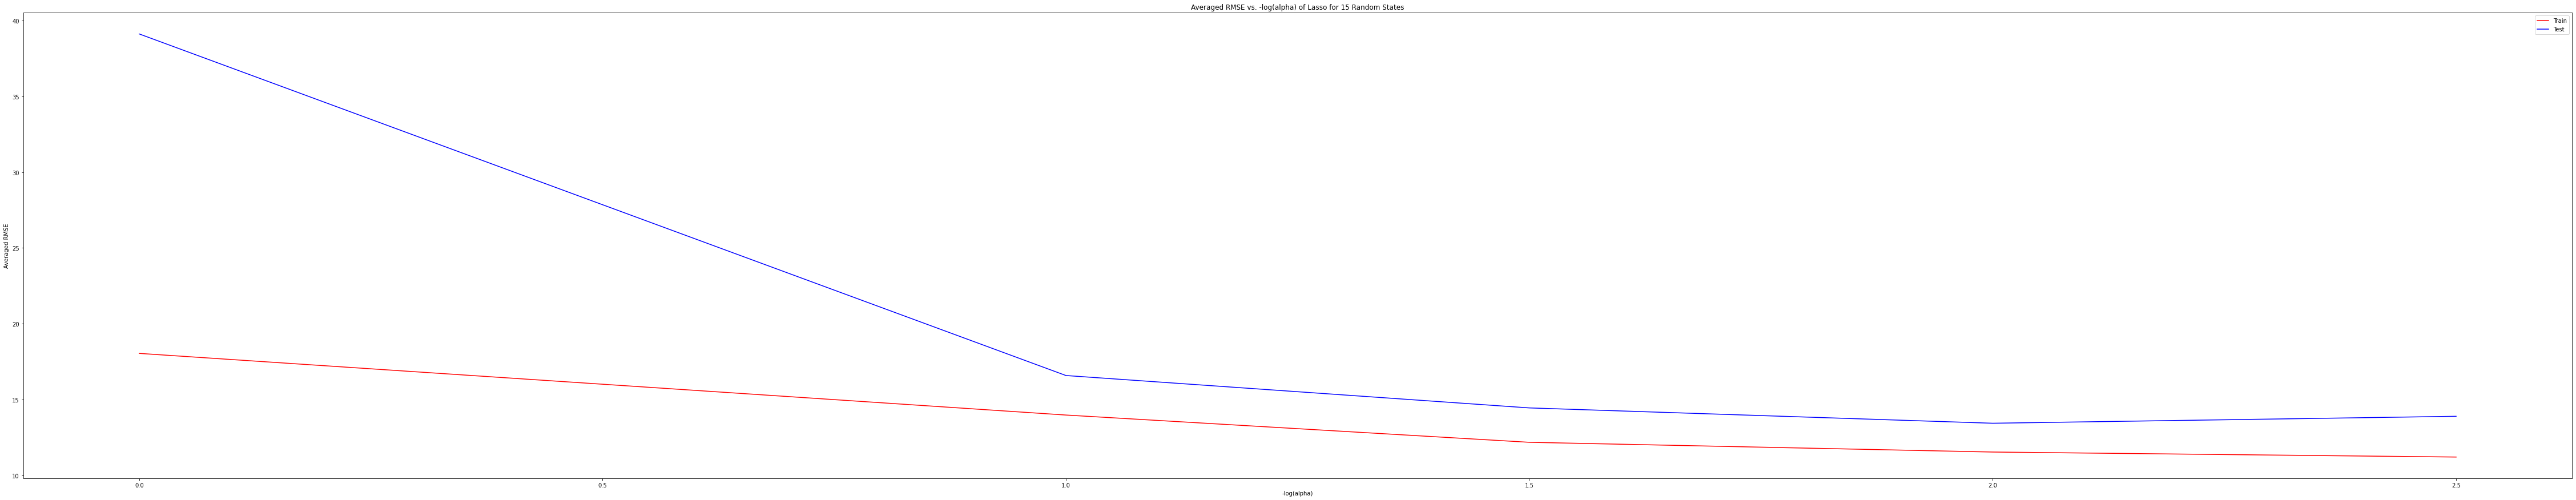

In [21]:
plt.plot(alpha_powers, train_rmse_averaged, 'r', label = "Train")
plt.plot(alpha_powers, test_rmse_averaged, 'b', label = "Test")
plt.title("Averaged RMSE vs. -log(alpha) of Lasso for 15 Random States")
plt.ylabel("Averaged RMSE")
plt.xlabel("-log(alpha)")
plt.legend()

#From here we know that the most optimal -log(alpha value would be 10^(-2))

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24386.998352921946, tolerance: 58.89391543293565
  model = cd_fast.enet_coordinate_descent(


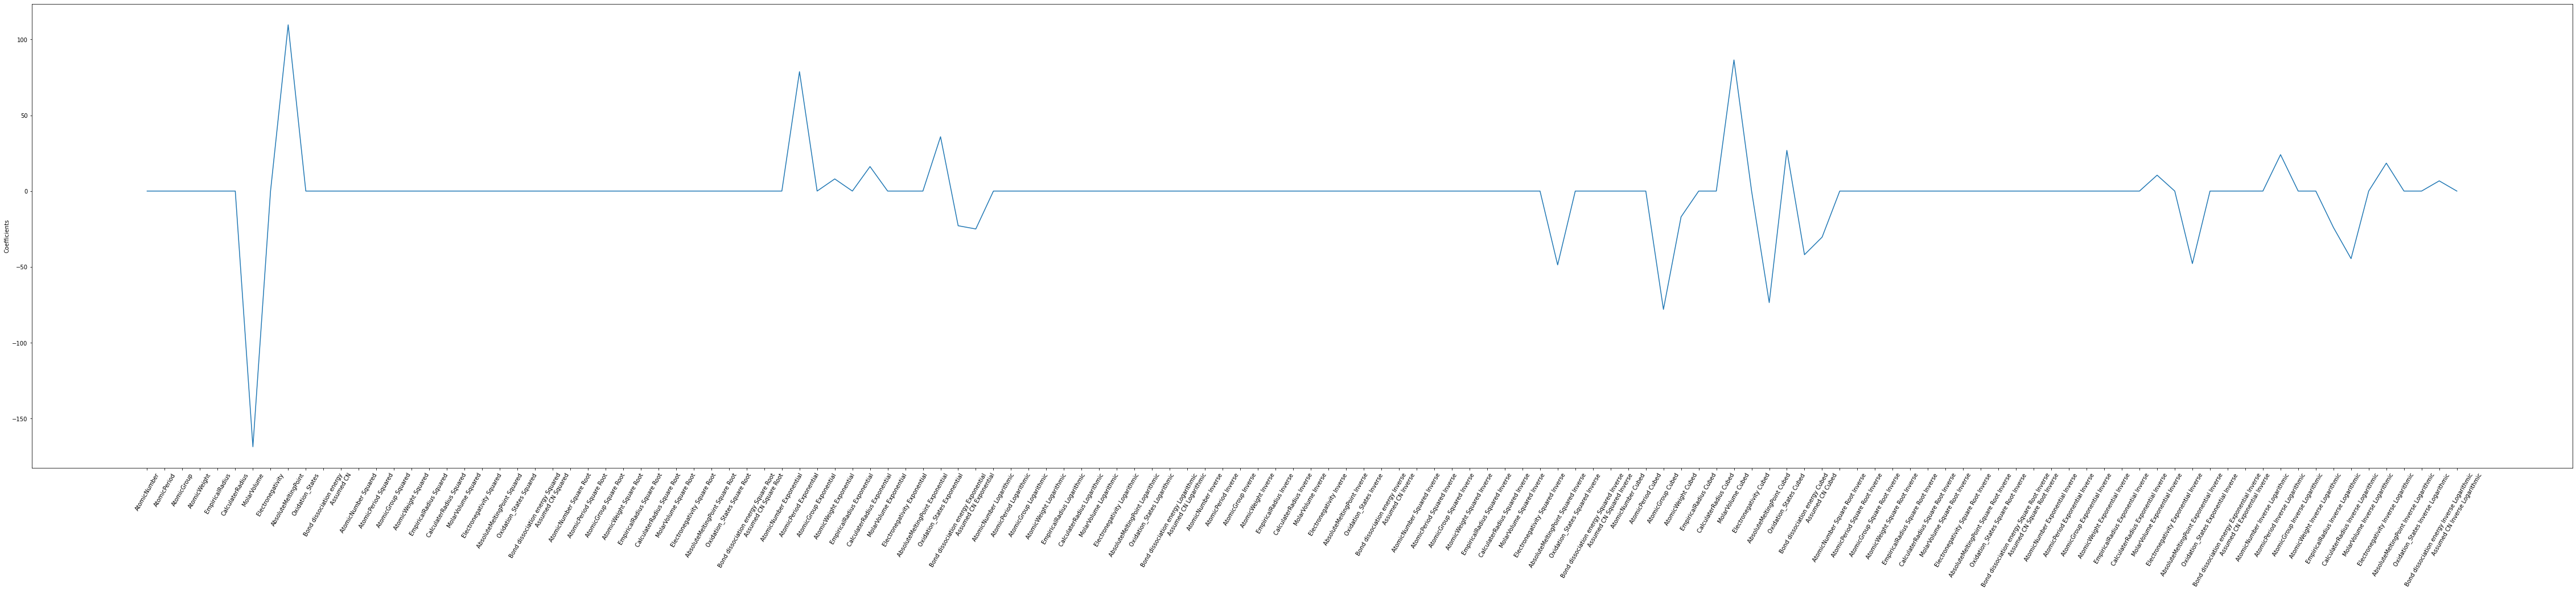

In [22]:
#Using optimal alpha value = 0.01
lasso = Lasso(alpha = 0.01)

X_youngs = all_transformed_data
Y_youngs = pd.read_csv("./Oxide_glass_1_5_02142020.csv")["Young's modulus E (GPa)"].values
plt.rcParams["figure.figsize"] = (80,15)
lasso_coeff_youngs = lasso.fit(X_youngs, Y_youngs).coef_
plotting_youngs = plt.plot(range(len(all_feature_names)), lasso_coeff_youngs)
plotting_youngs = plt.xticks(range(len(all_feature_names)), all_feature_names, rotation=60)
plotting_youngs = plt.ylabel("Coefficients")
plt.show() #Do cross-validation

In [23]:
feature_names_to_coeff = {}
for i in range(len(all_feature_names)):
    feature_names_to_coeff[all_feature_names[i]] = lasso_coeff_youngs[i]
feature_names_to_coeff #Delete all zero terms

{'AtomicNumber': 0.0,
 'AtomicPeriod': 0.0,
 'AtomicGroup': -0.0,
 'AtomicWeight': 0.0,
 'EmpiricalRadius': -0.0,
 'CalculaterRadius': 0.0,
 'MolarVolume': -168.74343609885437,
 'Electronegativity': -0.0,
 'AbsoluteMeltingPoint': 109.70252598885011,
 'Oxidation_States': 0.0,
 'Bond dissociation energy': -0.0,
 'Assumed CN': -0.0,
 'AtomicNumber Squared': 0.0,
 'AtomicPeriod Squared': 0.0,
 'AtomicGroup Squared': -0.0,
 'AtomicWeight Squared': 0.0,
 'EmpiricalRadius Squared': -0.0,
 'CalculaterRadius Squared': 0.0,
 'MolarVolume Squared': 0.0,
 'Electronegativity Squared': -0.0,
 'AbsoluteMeltingPoint Squared': 0.0,
 'Oxidation_States Squared': 0.0,
 'Bond dissociation energy Squared': -0.0,
 'Assumed CN Squared': -0.0,
 'AtomicNumber Square Root': 0.0,
 'AtomicPeriod Square Root': 0.0,
 'AtomicGroup Square Root': -0.0,
 'AtomicWeight Square Root': 0.0,
 'EmpiricalRadius Square Root': 0.0,
 'CalculaterRadius Square Root': 0.0,
 'MolarVolume Square Root': -0.0,
 'Electronegativity Square

In [24]:
filtered_names_to_coeff = {}
for feature in feature_names_to_coeff:
    if feature_names_to_coeff[feature] != 0.0 and feature_names_to_coeff[feature] != -0.0:
        filtered_names_to_coeff[feature] = abs(feature_names_to_coeff[feature])
filtered_names_to_coeff

{'MolarVolume': 168.74343609885437,
 'AbsoluteMeltingPoint': 109.70252598885011,
 'AtomicPeriod Exponential': 78.78180930540036,
 'AtomicWeight Exponential': 8.010033810499104,
 'CalculaterRadius Exponential': 16.16392144434598,
 'Oxidation_States Exponential': 35.86711969979829,
 'Bond dissociation energy Exponential': 22.883234682709368,
 'Assumed CN Exponential': 25.012529677948972,
 'AbsoluteMeltingPoint Squared Inverse': 48.711183989413094,
 'AtomicGroup Cubed': 78.07644310218883,
 'AtomicWeight Cubed': 17.03415161162247,
 'MolarVolume Cubed': 86.5207321550267,
 'AbsoluteMeltingPoint Cubed': 73.60348505771523,
 'Oxidation_States Cubed': 26.838773941394578,
 'Bond dissociation energy Cubed': 41.98646536970127,
 'Assumed CN Cubed': 30.394011047643964,
 'MolarVolume Exponential Inverse': 10.487220768703072,
 'AbsoluteMeltingPoint Exponential Inverse': 47.85119047298944,
 'AtomicNumber Inverse Logarithmic': 0.009574828732384303,
 'AtomicPeriod Inverse Logarithmic': 24.02418457584213,


In [25]:
ranked_names = []
for name in filtered_names_to_coeff:
    ranked_names.append((name, filtered_names_to_coeff[name]))
ranked_names.sort(key = lambda x: x[1], reverse = True)
ranked_names

[('MolarVolume', 168.74343609885437),
 ('AbsoluteMeltingPoint', 109.70252598885011),
 ('MolarVolume Cubed', 86.5207321550267),
 ('AtomicPeriod Exponential', 78.78180930540036),
 ('AtomicGroup Cubed', 78.07644310218883),
 ('AbsoluteMeltingPoint Cubed', 73.60348505771523),
 ('AbsoluteMeltingPoint Squared Inverse', 48.711183989413094),
 ('AbsoluteMeltingPoint Exponential Inverse', 47.85119047298944),
 ('CalculaterRadius Inverse Logarithmic', 44.58544427066096),
 ('Bond dissociation energy Cubed', 41.98646536970127),
 ('Oxidation_States Exponential', 35.86711969979829),
 ('Assumed CN Cubed', 30.394011047643964),
 ('Oxidation_States Cubed', 26.838773941394578),
 ('Assumed CN Exponential', 25.012529677948972),
 ('EmpiricalRadius Inverse Logarithmic', 24.024696993848057),
 ('AtomicPeriod Inverse Logarithmic', 24.02418457584213),
 ('Bond dissociation energy Exponential', 22.883234682709368),
 ('Electronegativity Inverse Logarithmic', 18.42722974981537),
 ('AtomicWeight Cubed', 17.0341516116224

In [26]:
all_feature_names

Index(['AtomicNumber', 'AtomicPeriod', 'AtomicGroup', 'AtomicWeight',
       'EmpiricalRadius', 'CalculaterRadius', 'MolarVolume',
       'Electronegativity', 'AbsoluteMeltingPoint', 'Oxidation_States',
       ...
       'AtomicGroup Inverse Logarithmic', 'AtomicWeight Inverse Logarithmic',
       'EmpiricalRadius Inverse Logarithmic',
       'CalculaterRadius Inverse Logarithmic',
       'MolarVolume Inverse Logarithmic',
       'Electronegativity Inverse Logarithmic',
       'AbsoluteMeltingPoint Inverse Logarithmic',
       'Oxidation_States Inverse Logarithmic',
       'Bond dissociation energy Inverse Logarithmic',
       'Assumed CN Inverse Logarithmic'],
      dtype='object', length=132)

In [ ]:





#Compare to initial RandomForestRegressor